In [1]:
setwd('D:/Workspace/R/data')

In [2]:
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [3]:
df = read.csv('sale_data.csv')

In [4]:
head(df)

X,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
1,200901,과즙음료,45,990,2611,4,126753,151,12
2,200902,과즙음료,45,1199,2689,9,113399,3014,8
3,200903,과즙음료,43,1102,2735,12,129162,1383,9
4,200904,과즙음료,42,1326,2807,19,126277,3564,8
5,200905,과즙음료,46,1672,2674,25,129584,9288,12
6,200906,과즙음료,48,1875,2777,27,123218,9998,8


In [5]:
summary(df)

       X                YM               CATEGORY     ITEM_CNT    
 Min.   :  1.00   Min.   :200901   과즙음료  :60   Min.   : 1.00  
 1st Qu.: 45.75   1st Qu.:201004   비타민음료:60   1st Qu.:14.00  
 Median : 90.50   Median :201107   차음료    :60   Median :43.00  
 Mean   : 90.50   Mean   :201107                   Mean   :39.57  
 3rd Qu.:135.25   3rd Qu.:201209                   3rd Qu.:57.00  
 Max.   :180.00   Max.   :201312                   Max.   :83.00  
      QTY             PRICE         MAXTEMP         SALEDAY      
 Min.   :  27.0   Min.   :1229   Min.   :-1.00   Min.   :113399  
 1st Qu.: 814.5   1st Qu.:1424   1st Qu.: 9.75   1st Qu.:143047  
 Median :1734.0   Median :1762   Median :19.50   Median :179564  
 Mean   :1685.7   Mean   :1915   Mean   :17.55   Mean   :181596  
 3rd Qu.:2387.2   3rd Qu.:2347   3rd Qu.:27.00   3rd Qu.:224721  
 Max.   :3992.0   Max.   :3251   Max.   :31.00   Max.   :245068  
    RAIN_DAY        HOLIDAY    
 Min.   :    0   Min.   : 8.0  
 1st Qu.: 2750   

In [6]:
product1 = df %>% filter(df$CATEGORY == '과즙음료')
product2 = df %>% filter(df$CATEGORY == '비타민음료')
product3 = df %>% filter(df$CATEGORY == '차음료')

product1 = product1[-c(3,4)]
product2 = product2[-c(3,4)]
product3 = product3[-c(3,4)]

In [7]:
head(product1)

X,YM,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
1,200901,990,2611,4,126753,151,12
2,200902,1199,2689,9,113399,3014,8
3,200903,1102,2735,12,129162,1383,9
4,200904,1326,2807,19,126277,3564,8
5,200905,1672,2674,25,129584,9288,12
6,200906,1875,2777,27,123218,9998,8


In [8]:
shapiro.test(product1$QTY)
shapiro.test(product2$QTY)
shapiro.test(product3$QTY)


	Shapiro-Wilk normality test

data:  product1$QTY
W = 0.97503, p-value = 0.255



	Shapiro-Wilk normality test

data:  product2$QTY
W = 0.95973, p-value = 0.04565



	Shapiro-Wilk normality test

data:  product3$QTY
W = 0.96497, p-value = 0.0825


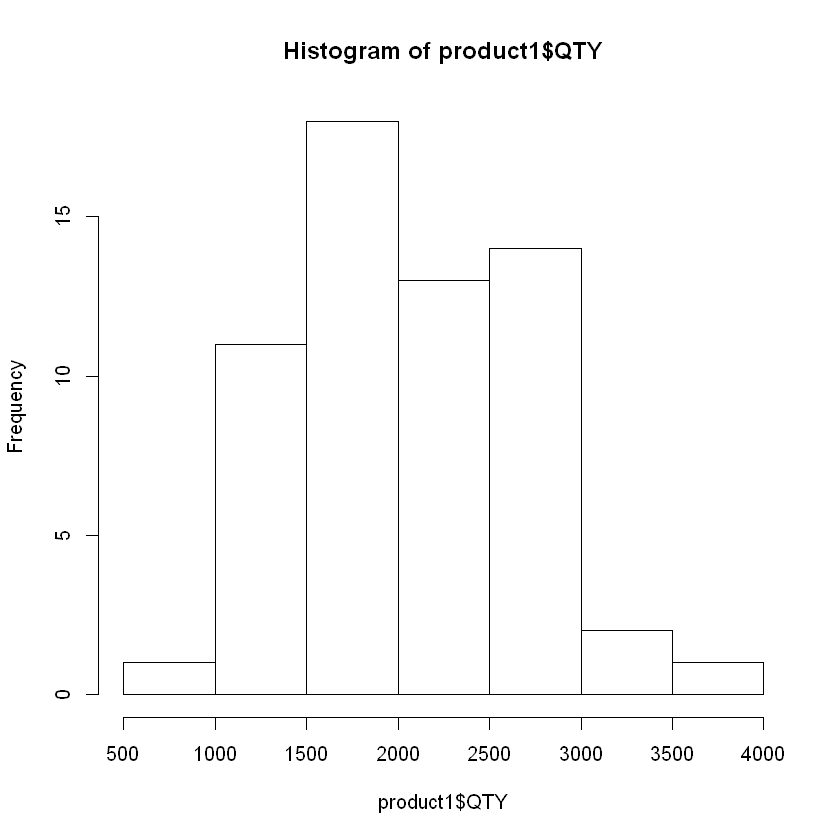

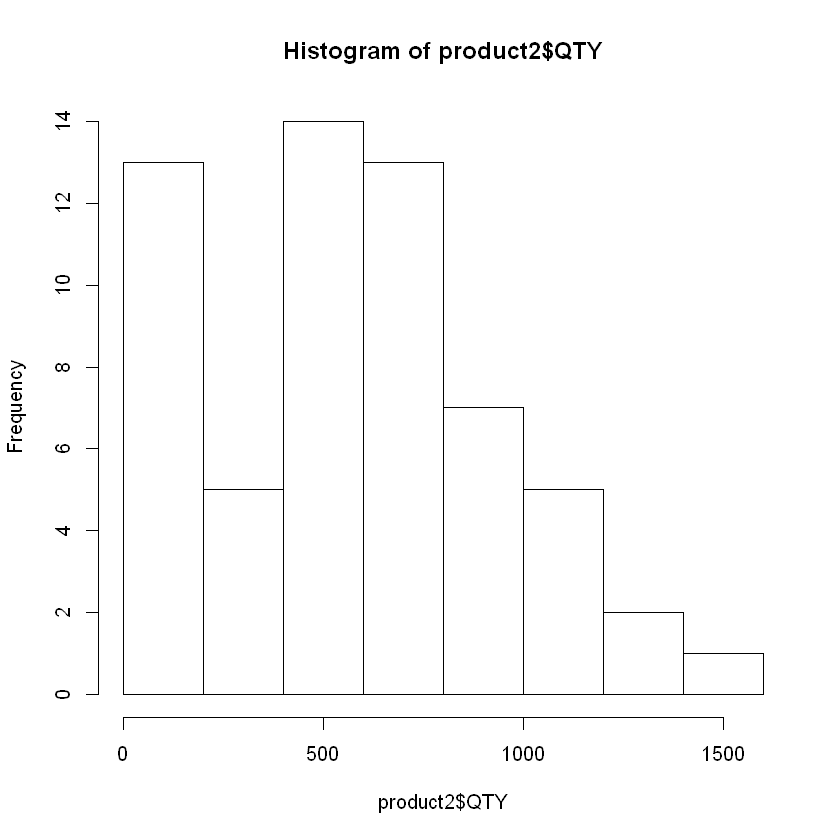

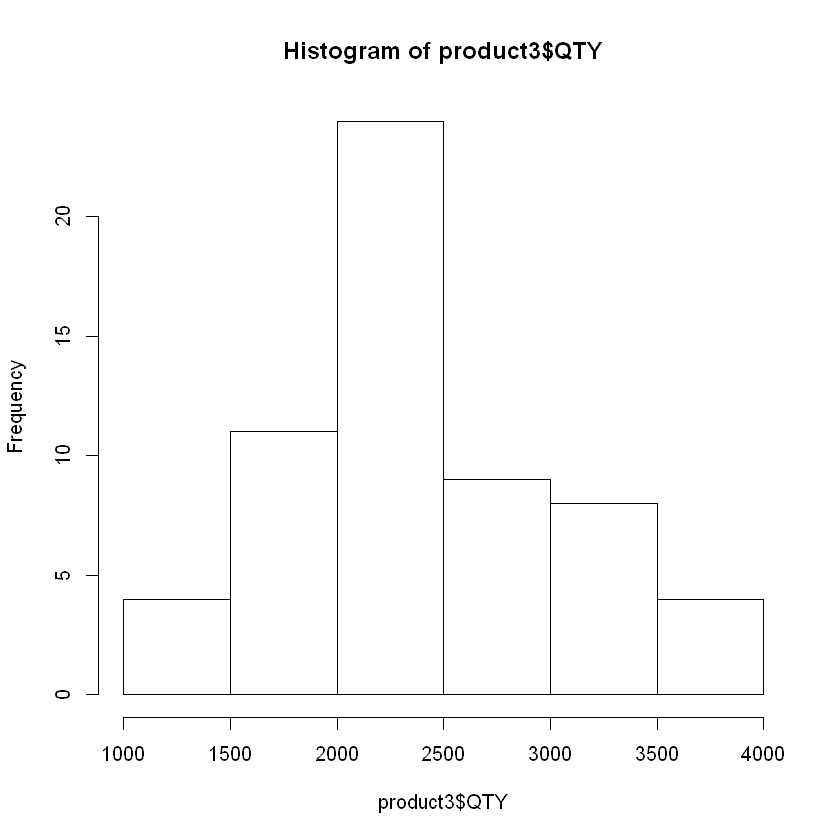

In [9]:
hist(product1$QTY)
hist(product2$QTY)
hist(product3$QTY)

In [10]:
cor(product1)
cor(product2)
cor(product3)

,X,YM,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
X,1.00000000,0.98450439,0.50726752,-0.62765144,0.0268349535,0.97761662,0.21307159,0.1268284622
YM,0.98450439,1.00000000,0.48166634,-0.59583153,-0.0213870757,0.96415953,0.19579703,0.1477518768
QTY,0.50726752,0.48166634,1.00000000,-0.09838038,0.7071806840,0.50189095,0.47567660,0.1367153610
PRICE,-0.62765144,-0.59583153,-0.09838038,1.00000000,-0.0843639944,-0.61948901,-0.21129511,-0.1157278564
MAXTEMP,0.02683495,-0.02138708,0.70718068,-0.08436399,1.0000000000,0.02615313,0.67485293,-0.0007330759
SALEDAY,0.97761662,0.96415953,0.50189095,-0.61948901,0.0261531274,1.00000000,0.21351983,0.1509168646
RAIN_DAY,0.21307159,0.19579703,0.47567660,-0.21129511,0.6748529252,0.21351983,1.00000000,-0.0513513553
HOLIDAY,0.12682846,0.14775188,0.13671536,-0.11572786,-0.0007330759,0.15091686,-0.05135136,1.0000000000


,X,YM,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
X,1.00000000,0.98450439,0.7178111,0.87476568,0.0268349535,0.97761662,0.21307159,0.1268284622
YM,0.98450439,1.00000000,0.6973076,0.86444562,-0.0213870757,0.96415953,0.19579703,0.1477518768
QTY,0.71781114,0.69730757,1.0000000,0.72105041,0.3615501216,0.71192476,0.51181463,0.1201901927
PRICE,0.87476568,0.86444562,0.7210504,1.00000000,-0.0447921578,0.82446317,0.20432138,0.1188034038
MAXTEMP,0.02683495,-0.02138708,0.3615501,-0.04479216,1.0000000000,0.02615313,0.67485293,-0.0007330759
SALEDAY,0.97761662,0.96415953,0.7119248,0.82446317,0.0261531274,1.00000000,0.21351983,0.1509168646
RAIN_DAY,0.21307159,0.19579703,0.5118146,0.20432138,0.6748529252,0.21351983,1.00000000,-0.0513513553
HOLIDAY,0.12682846,0.14775188,0.1201902,0.11880340,-0.0007330759,0.15091686,-0.05135136,1.0000000000


,X,YM,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
X,1.00000000,0.98450439,0.6545894,0.74748955,0.0268349535,0.97761662,0.21307159,0.1268284622
YM,0.98450439,1.00000000,0.6126286,0.75571298,-0.0213870757,0.96415953,0.19579703,0.1477518768
QTY,0.65458939,0.61262860,1.0000000,0.51443998,0.6762249882,0.66706580,0.53253647,0.1490117845
PRICE,0.74748955,0.75571298,0.5144400,1.00000000,-0.0209906744,0.79781578,0.11965126,0.1516141402
MAXTEMP,0.02683495,-0.02138708,0.6762250,-0.02099067,1.0000000000,0.02615313,0.67485293,-0.0007330759
SALEDAY,0.97761662,0.96415953,0.6670658,0.79781578,0.0261531274,1.00000000,0.21351983,0.1509168646
RAIN_DAY,0.21307159,0.19579703,0.5325365,0.11965126,0.6748529252,0.21351983,1.00000000,-0.0513513553
HOLIDAY,0.12682846,0.14775188,0.1490118,0.15161414,-0.0007330759,0.15091686,-0.05135136,1.0000000000


In [11]:
out1 = lm(QTY~., data=product1)
out2 = lm(QTY~., data=product2)
out3 = lm(QTY~., data=product3)

In [85]:
both1 = step(out1, direction = 'both', trace = FALSE)
both2 = step(out2, direction = 'both', trace = FALSE)
both3 = step(out3, direction = 'both', trace = FALSE)

In [22]:
summary(out1)


Call:
lm(formula = QTY ~ ., data = product1)

Residuals:
    Min      1Q  Median      3Q     Max 
-500.50 -140.10    0.43  168.77  643.73 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.664e+05  2.618e+05  -1.018   0.3135    
X            1.198e+01  1.332e+01   0.899   0.3728    
YM           1.315e+00  1.304e+00   1.009   0.3178    
PRICE        7.558e-01  1.103e-01   6.855 8.44e-09 ***
MAXTEMP      5.489e+01  4.494e+00  12.213  < 2e-16 ***
SALEDAY      2.378e-03  3.412e-03   0.697   0.4889    
RAIN_DAY    -1.021e-02  4.254e-03  -2.399   0.0201 *  
HOLIDAY      3.638e+01  2.644e+01   1.376   0.1747    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 232.1 on 52 degrees of freedom
Multiple R-squared:  0.8805,	Adjusted R-squared:  0.8644 
F-statistic: 54.75 on 7 and 52 DF,  p-value: < 2.2e-16


In [23]:
summary(out2)


Call:
lm(formula = QTY ~ ., data = product2)

Residuals:
    Min      1Q  Median      3Q     Max 
-320.60 -140.02  -28.69   68.02  637.59 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -4.200e+04  2.318e+05  -0.181  0.85696   
X           -8.902e+00  1.303e+01  -0.683  0.49766   
YM           2.018e-01  1.157e+00   0.174  0.86222   
PRICE        9.297e-01  2.870e-01   3.239  0.00209 **
MAXTEMP      9.930e+00  4.174e+00   2.379  0.02107 * 
SALEDAY      4.907e-03  3.243e-03   1.513  0.13634   
RAIN_DAY     6.743e-03  3.905e-03   1.727  0.09016 . 
HOLIDAY      7.603e+00  2.381e+01   0.319  0.75076   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 208.8 on 52 degrees of freedom
Multiple R-squared:  0.725,	Adjusted R-squared:  0.688 
F-statistic: 19.59 on 7 and 52 DF,  p-value: 1.49e-12


In [24]:
summary(out3)


Call:
lm(formula = QTY ~ ., data = product3)

Residuals:
    Min      1Q  Median      3Q     Max 
-470.29 -127.12  -32.39  113.07  886.57 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.573e+04  2.620e+05   0.136   0.8920    
X            4.603e+00  1.366e+01   0.337   0.7375    
YM          -1.831e-01  1.311e+00  -0.140   0.8895    
PRICE        1.518e-01  4.617e-01   0.329   0.7437    
MAXTEMP      4.812e+01  4.522e+00  10.642 1.16e-14 ***
SALEDAY      8.540e-03  3.910e-03   2.184   0.0335 *  
RAIN_DAY    -5.825e-03  4.275e-03  -1.363   0.1789    
HOLIDAY      2.579e+01  2.653e+01   0.972   0.3354    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 233.5 on 52 degrees of freedom
Multiple R-squared:  0.8868,	Adjusted R-squared:  0.8716 
F-statistic:  58.2 on 7 and 52 DF,  p-value: < 2.2e-16


In [16]:
anova(both1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
X,1,6032093.1,6032093.1,112.949753,7.581650e-15
PRICE,1,1872212.3,1872212.3,35.056805,2.283267e-07
MAXTEMP,1,12188026.3,12188026.3,228.218387,4.862521e-21
RAIN_DAY,1,315927.1,315927.1,5.915672,1.835197e-02
HOLIDAY,1,149825.9,149825.9,2.805460,9.972630e-02
Residuals,54,2883875.5,53405.1,NA,NA


In [17]:
anova(both2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PRICE,1,4286276.4,4286276.39,102.302949,3.706056e-14
MAXTEMP,1,1281378.3,1281378.34,30.583371,9.114061e-07
SALEDAY,1,223276.5,223276.53,5.329065,2.475744e-02
RAIN_DAY,1,148893.1,148893.08,3.553714,6.469945e-02
Residuals,55,2304383.3,41897.88,NA,NA


In [18]:
anova(both3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
MAXTEMP,1,11456238.0,11456238.03,221.561761,4.056595e-21
SALEDAY,1,10571950.1,10571950.15,204.459778,2.426452e-20
RAIN_DAY,1,129225.9,129225.89,2.499208,1.195359e-01
Residuals,56,2895577.9,51706.75,NA,NA


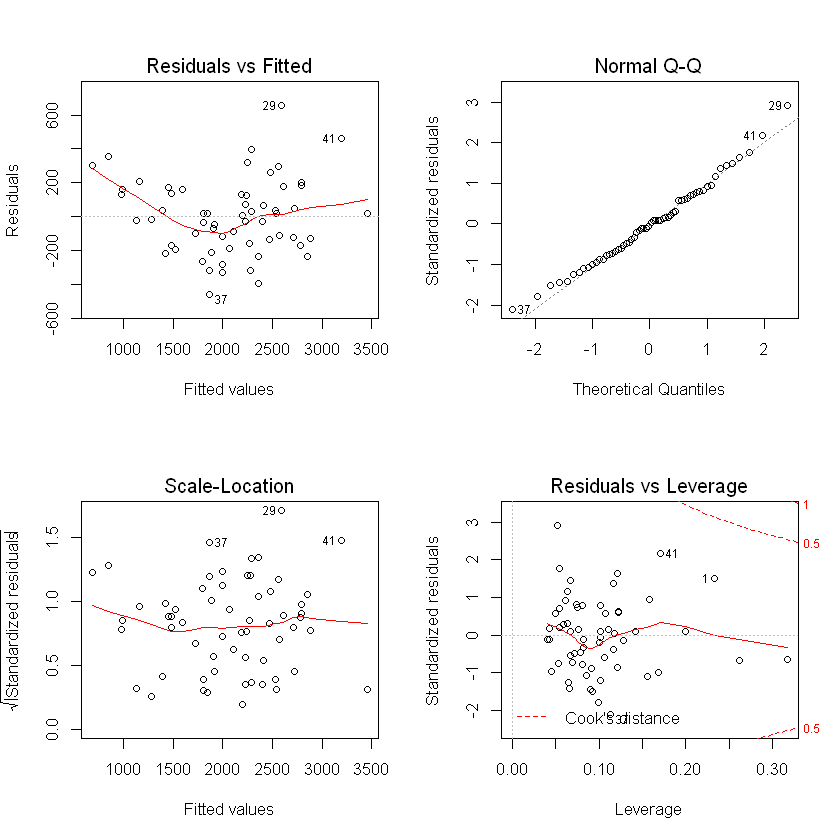

In [19]:
par(mfrow = c(2,2))
plot(both1)

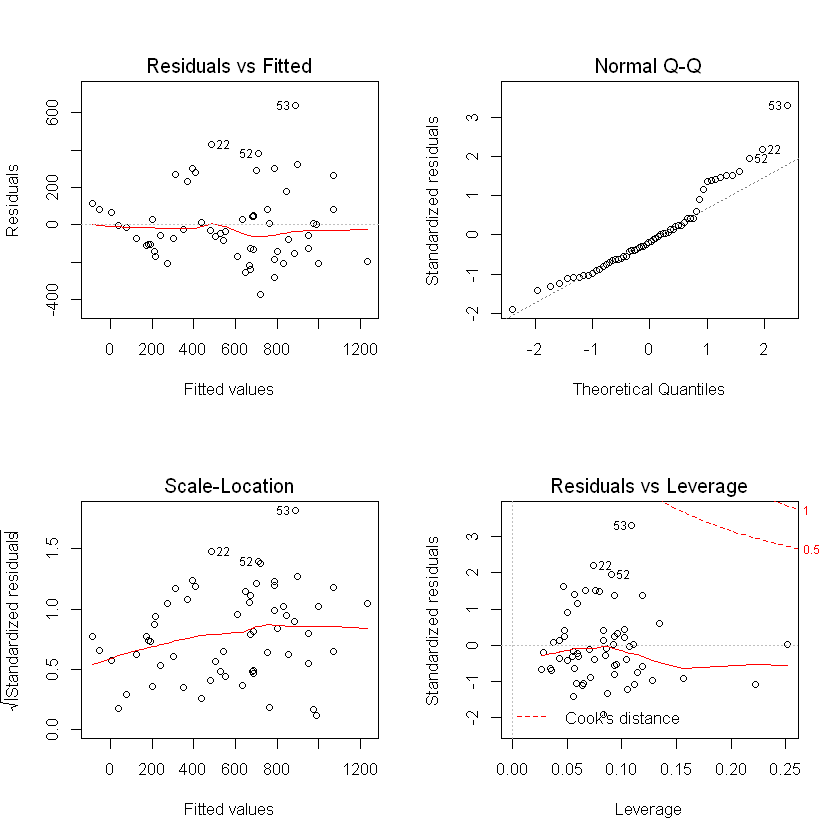

In [20]:
par(mfrow = c(2,2))
plot(both2)

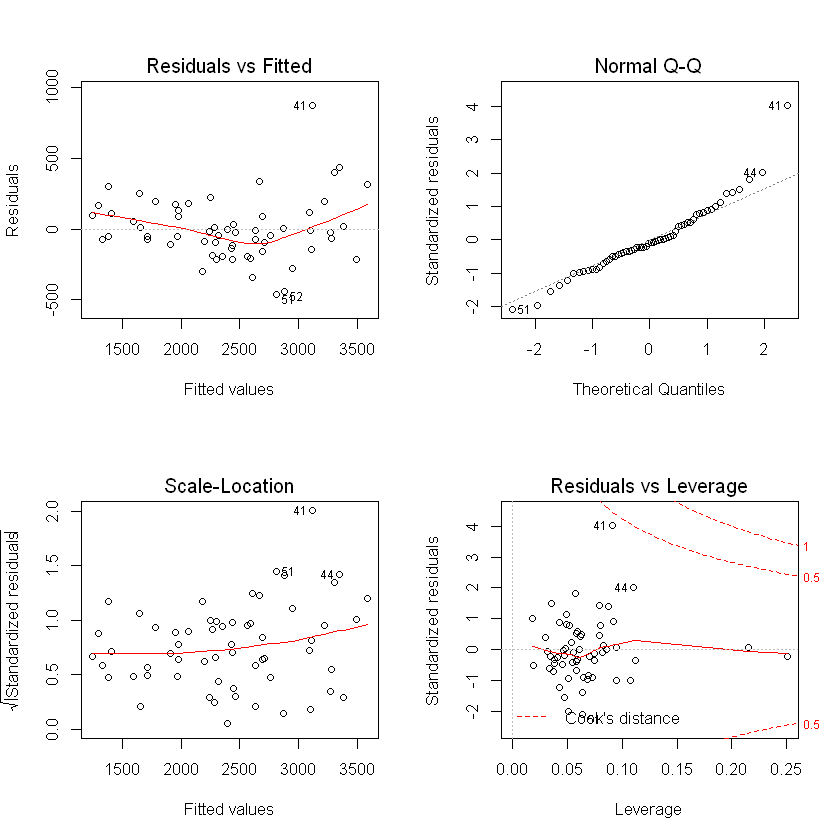

In [21]:
par(mfrow = c(2,2))
plot(both3)

In [71]:
pred1 = product1 %>%
  mutate(pred_QTY = -1854 + X * 18.47 + 16.46 * ITEM_CNT + 0.4013 * PRICE + 52.37 * MAXTEMP - 0.01127 * RAIN_DAY + 46.87 * HOLIDAY )

X,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY,pred_QTY
1,45,990,2611,4,126753,151,12,723.1825
2,45,1199,2689,9,113399,3014,8,815.0579
3,43,1102,2735,12,129162,1383,9,1041.4291
4,42,1326,2807,19,126277,3564,8,1367.4728
5,46,1672,2674,25,129584,9288,12,1835.6004
6,48,1875,2777,27,123218,9998,8,1837.5826
7,53,1663,2858,28,131083,17405,8,1939.7510
8,52,1957,2886,29,130040,7704,10,2208.4377
9,54,2021,2838,27,131989,4096,8,2082.7475
10,56,1718,2879,22,136095,2824,10,1996.8162


In [108]:
a1 = predict(both1, product1, interval = 'predict')
a2 = cbind(a1, product1$QTY)
head(a2)
a2$pre[a2$'product1$QTY' > a2$lwr & a2$'product1$QTY' < a2$upr] = T
# a2$pre[is.na(a2$pre)] = F
# [a1$lwr < a2 && a2 < a1$upr]

fit,lwr,upr,
686.8905,172.4004,1201.381,990
843.0463,352.4525,1333.640,1199
1125.2574,643.3687,1607.146,1102
1519.2904,1035.2684,2003.312,1326
1884.4394,1383.6863,2385.193,1672
1919.8102,1433.9404,2405.680,1875


ERROR: Error in `*tmp*`$pre: $ operator is invalid for atomic vectors


In [88]:
predict(both2, product2, interval = 'predict')

fit,lwr,upr
-86.739395,-523.63848,350.1597
-53.967037,-484.68973,376.7557
3.113432,-426.33365,432.5605
76.682400,-350.79259,504.1574
181.602107,-247.37894,610.5832
189.032071,-240.28008,618.3442
270.545309,-161.95893,703.0496
209.171227,-223.82960,642.1721
170.085813,-263.75619,603.9278
124.783224,-306.24657,555.8130


In [89]:
predict(both3, product3, interval = 'predict')

fit,lwr,upr
1248.767,775.6274,1721.906
1336.323,864.0665,1808.579
1654.316,1187.9719,2120.659
1950.854,1483.7693,2417.939
2239.549,1771.6073,2707.491
2266.859,1795.8821,2737.836
2348.527,1878.5774,2818.476
2448.788,1974.7549,2922.821
2394.791,1920.1666,2869.416
2202.124,1733.6096,2670.639


In [47]:
library(forecast)

Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [83]:
a =meanf(product1$QTY, 30)

In [84]:
summary(a)


Forecast method: Mean

Model Information:
$mu
[1] 2074.217

$mu.se
[1] 81.37581

$sd
[1] 630.3343

$bootstrap
[1] FALSE

$call
meanf(y = product1$QTY, h = 30)

attr(,"class")
[1] "meanf"

Error measures:
                        ME     RMSE      MAE       MPE     MAPE MASE
Training set -3.039236e-14 625.0595 528.4572 -10.25847 29.01239    1

Forecasts:
   Point Forecast    Lo 80    Hi 80    Lo 95   Hi 95
 1       2074.217 1250.482 2897.951 802.4532 3345.98
 2       2074.217 1250.482 2897.951 802.4532 3345.98
 3       2074.217 1250.482 2897.951 802.4532 3345.98
 4       2074.217 1250.482 2897.951 802.4532 3345.98
 5       2074.217 1250.482 2897.951 802.4532 3345.98
 6       2074.217 1250.482 2897.951 802.4532 3345.98
 7       2074.217 1250.482 2897.951 802.4532 3345.98
 8       2074.217 1250.482 2897.951 802.4532 3345.98
 9       2074.217 1250.482 2897.951 802.4532 3345.98
10       2074.217 1250.482 2897.951 802.4532 3345.98
11       2074.217 1250.482 2897.951 802.4532 3345.98
12       

In [72]:
library(autoplot)

ERROR: Error in library(autoplot): there is no package called 'autoplot'


In [80]:
autoplot(product1$QTY, product1$X)

ERROR: Error: Objects of type integer not supported by autoplot.
